<a href="https://colab.research.google.com/github/drvoss/Colab-Notebooks/blob/master/Making_MPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

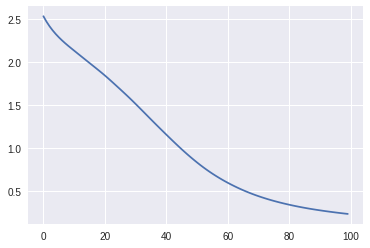

In [1]:
import torch
from torch import nn
net = nn.Sequential(
  nn.Linear(64, 32),
  nn.ReLU(),
  nn.Linear(32, 16),
  nn.ReLU(),
  nn.Linear(16, 10)
)

from torch import optim
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target

# NumPy의 ndarray를 파이토치의 텐서로 변환
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

#X = torch.tensor(X, device="cuda:0")
#Y = torch.tensor(Y, device="cuda:0")

#using GPU start
X = X.to("cuda:0")
Y = Y.to("cuda:0")
net.to("cuda:0")
# 이후 처리는 동일하게 optimizer를 설정해서 학습 루프를 돌린다
#using GPU end

# 소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()

# Adam
optimizer = optim.Adam(net.parameters())
# 손실 함수의 로그
losses = []
# 100회 반복
for epoc in range(100):
  # backward 메서드로 계산된
  # 이전 값을 삭제
  optimizer.zero_grad()
  # 선형 모델로 y의 예측 값 계산
  y_pred = net(X)
  # MSE loss와 w를 사용한 미분 계산
  loss = loss_fn(y_pred, Y)
  loss.backward()
  # 경사를 갱신
  optimizer.step()
  # 수렴 확인을 위해 loss를 기록해 둔다
  losses.append(loss.item())
  
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)
